In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Introduction to PyTorch

## The PyTorch Tensor: the fundamental object of PyTorch

You can intialize a Pytorch tensor in a number of ways using `torch.tensor()`:

* with a `float` or `int`:

In [2]:
x = torch.tensor(2.0)
x

tensor(2.)

* with a Python list:

In [3]:
l = [1.0, 2.0, 3.0]
y = torch.tensor(l)
y

tensor([1., 2., 3.])

* with a Numpy array:

In [4]:
a = np.array([4.0, 5.0])
z = torch.tensor(a)
z

tensor([4., 5.], dtype=torch.float64)

Common operations are available through PyTorch:

In [5]:
x * y, torch.sin(y), torch.exp(y)

(tensor([2., 4., 6.]),
 tensor([0.8415, 0.9093, 0.1411]),
 tensor([ 2.7183,  7.3891, 20.0855]))

## Backpropagating Gradients via the `backward()` Method: a simple example

Consider a simple affine function of two variables

$$
    f(x_1, x_2; w_1, w_2, b) = w_1 x_1 + w_2 x_2 + b
$$

How can we compute $\nabla_{W} f(x_1, x_2) = (x_1, x_2, 1)$ where $W = (w_1, w_2, b)$?

* Initialize input data $x_1, x_2$:

In [6]:
x1 = torch.tensor(10.0)
x2 = torch.tensor(11.0)
print(x1, x2)

tensor(10.) tensor(11.)


* Initialize $w_1, w_2, b$ to require gradients using `requires_grad = True`:

In [7]:
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(2.0, requires_grad=True)
b  = torch.tensor(3.0, requires_grad=True)
print(w1, w2, b)

tensor(1., requires_grad=True) tensor(2., requires_grad=True) tensor(3., requires_grad=True)


* Compute output in forward pass (this generates a computational graph):

In [8]:
w1x1 = w1 * x1
w2x2 = w2 * x2
f = w1x1 + w2x2 + b
print(f)

tensor(35., grad_fn=<AddBackward0>)


* Compute gradients in `backward()` pass:

In [9]:
f.backward()
print(w1.grad, w2.grad, b.grad)

tensor(10.) tensor(11.) tensor(1.)


In [10]:
print(x1.grad)

None


## Implementing Gradient Descent: a convex example

Let's use what we've learned to help us find the minimum of the function

$$
    f(x,y) = x^2 + y^2
$$

* Define $f$ and initialize $x,y$:

In [11]:
def f(x, y):
    return x**2 + y**2

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

* Compute output in forward pass:

In [12]:
z = f(x, y)
print(z)

tensor(5., grad_fn=<AddBackward0>)


* Compute gradients in ```backward()``` pass:

In [13]:
z.backward()
print(x.grad, y.grad)

tensor(2.) tensor(4.)


**Let's a take a descent step**:

Remember that for arbitrary $x \in \mathbb{R}^n$, if we define

$$
    x^* = x - \alpha \nabla f(x)
$$

for sufficiently small $\alpha > 0$, then $f(x^*) < f(x)$.

In [14]:
α = 0.01

with torch.no_grad():
    x = x - α * x.grad
    y = y - α * y.grad

    print(f(x, y))

tensor(4.8020)


**Using the ```optim``` package to make our lives easier:**

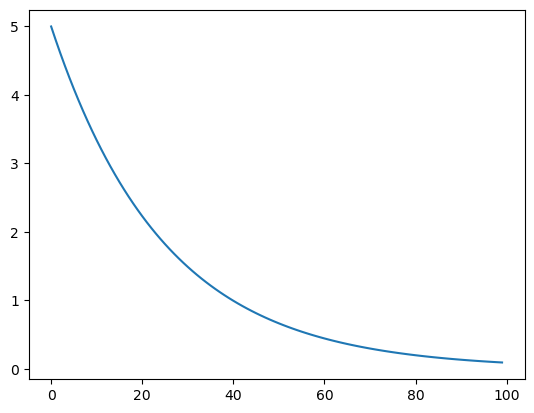

In [15]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
optimizer = torch.optim.SGD([x, y], lr=α)
z_vals = []

for _ in range(100):
    z = f(x, y)
    z.backward()
    optimizer.step()
    optimizer.zero_grad()
    z_vals.append(z.item())
    
plt.plot(z_vals)